# **LOGISTIC REGRESSION**


This notebook applies Logistic Regression techniques to classify weather conditions in Texas, with a focus on distinguishing between 'extremely hot' days and 'normal' days. We'll build a logistic regression model to predict the likelihood of extreme heat based on various weather features, and evaluate its performance using key classification metrics.

### **Objectives :**

In this notebook, certain objectives shall be achieved in order to fully grasp the consept of Logistic Regression. These concepts include three kinds of Logistic Regression or three things Logistic Regression can help one achieve, and they are;

- **Binary Logistic Regression**. This helps achieve Binary Classification

- **Multinomial Logistic Regression**. This helps achieve Multiple Classification

- **Probability Estimation**. This is not a type of Logistic Regression but it is something that can be achieve using Logistic Regression.

____

##  **What is Logistic Regression?**

**Logistic Regression** is a statistical method used to **predict a categorical outcome**, usually when the result is **binary** (e.g., Yes/No, 0/1, True/False).

Logistic regression forecasts the **probability** of a particular class or event occurring, as opposed to linear regression, which forecasts continuous values.  Any input value is mapped to a range between **0 and 1** using the **sigmoid (S-shaped) function**, which can then be understood as a probability.

 The model usually allocates the result to **class 0** (e.g., "normal day") if the projected probability is less than 0.5, or **class 1** (e.g., "extremely hot day").


 It is a straightforward yet effective approach that is frequently applied to binary classification issues.


____

## **Data Exploration**

In order to achieve the listed objectives above, the data we have needs to be explored, prepared and cleaned.

### Import Required Libraries

The packages and libraries used for this notebook include:

- Pandas : This for data loading and data manipulation.
- Numpy : This is for numericl operations and arrays
- Matplotlib : This is assits with ploting graphs
- Seaborn : This is for more advanced data visualisations

In [29]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

### Load Data

In [30]:
# Load data

df = pd.read_csv('../../weather_data.csv')

df.head()

,date,max_temp,min_temp,humidity,wind_speed,precipitation,pressure,solar_radiation
0,2019-01-01,87.5,59.5,67.2,8.3,0.07,1013.2,273.3
1,2019-01-02,84.7,72.4,75.4,10.8,0.14,1013.6,265.2
2,2019-01-03,88.9,65.2,79.2,12.2,0.07,1011.0,312.8
3,2019-01-04,93.6,66.1,75.2,13.0,0.05,1014.4,232.4
4,2019-01-05,85.2,69.9,70.0,10.2,0.05,1013.2,280.9


### Checking number of data per column

In [31]:
# Checking number of rows per column
df.isnull().count()

date               1826
max_temp           1826
min_temp           1826
humidity           1826
wind_speed         1826
precipitation      1826
pressure           1826
solar_radiation    1826
dtype: int64

### Listing the columns of the data set

The columns in this data set are as follows;

In [32]:
df.columns

Index(['date', 'max_temp', 'min_temp', 'humidity', 'wind_speed',
       'precipitation', 'pressure', 'solar_radiation'],
      dtype='object')

### Checking the type for each column

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             1826 non-null   object 
 1   max_temp         1826 non-null   float64
 2   min_temp         1826 non-null   float64
 3   humidity         1826 non-null   float64
 4   wind_speed       1826 non-null   float64
 5   precipitation    1826 non-null   float64
 6   pressure         1826 non-null   float64
 7   solar_radiation  1826 non-null   float64
dtypes: float64(7), object(1)
memory usage: 114.2+ KB


 It will be better to have date and time in a propper format. It will be changed to a datetime type.

In [34]:
# Changing the data type and confirming the changes

df['date'] = pd.to_datetime(df['date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             1826 non-null   datetime64[ns]
 1   max_temp         1826 non-null   float64       
 2   min_temp         1826 non-null   float64       
 3   humidity         1826 non-null   float64       
 4   wind_speed       1826 non-null   float64       
 5   precipitation    1826 non-null   float64       
 6   pressure         1826 non-null   float64       
 7   solar_radiation  1826 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 114.2 KB


____

## **Data Cleaning**

### Checking for Duplicates

In [35]:
# Making dure there are no dulicates

duplicates = df.duplicated().sum()
print(f"Number of duplicates in the dataset: {duplicates}")

Number of duplicates in the dataset: 0


No duplicates found

### Checking for Null values

In [36]:
# Checking number of null values per column
df.isnull().sum()

date               0
max_temp           0
min_temp           0
humidity           0
wind_speed         0
precipitation      0
pressure           0
solar_radiation    0
dtype: int64

No null values detected

____

## **Feature Distribution**

A feature distribution, as displayed by boxplots or histograms, illustrates how a variable's values are distributed. 
It aids in locating trends, anomalies, and skewness in the data, all of which inform choices about transformation, cleaning, and modeling.

## Historgram or Kernel Density Estimation Plot of Humidity 

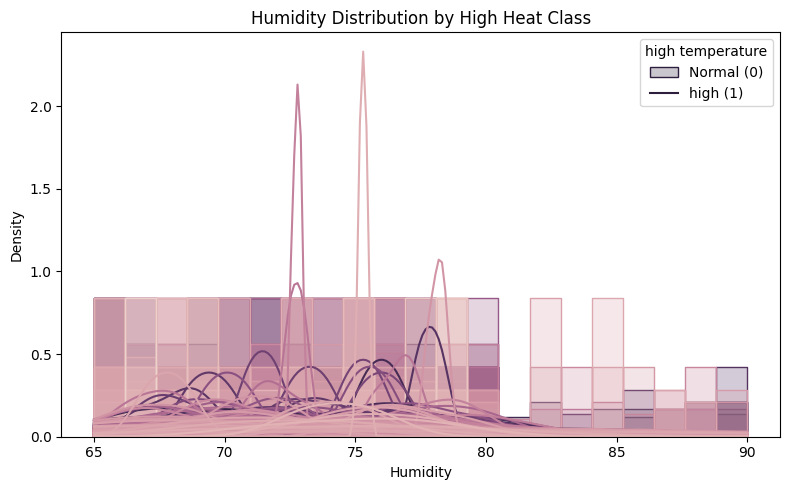

In [37]:
plt.figure(figsize=(8, 5))
sb.histplot(data=df, x='humidity', hue='max_temp', kde=True, stat='density', element='step', common_norm=False)
plt.title('Humidity Distribution by High Heat Class')
plt.xlabel('Humidity')
plt.ylabel('Density')
plt.legend(title='high temperature', labels=['Normal (0)', 'high (1)'])
plt.tight_layout()
plt.show()

**Interpretation of of the Plot**

Both classes mostly have humidity between 70–80%.

Extremely hot days (class 1) seem to have more peaks at lower humidity levels (like 70–75%), which might mean that high heat days are slightly more common when humidity is lower.

But there's a lot of overlap, meaning humidity alone may not clearly distinguish high-temperature days from normal ones.

## Box Plot of Solar Radiation

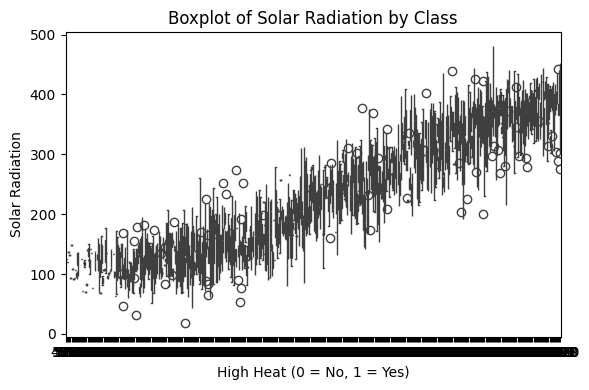

In [38]:
plt.figure(figsize=(6, 4))
sb.boxplot(data=df, x='max_temp', y='solar_radiation')
plt.title('Boxplot of Solar Radiation by Class')
plt.xlabel('High Heat (0 = No, 1 = Yes)')
plt.ylabel('Solar Radiation')
plt.tight_layout()
plt.show()


**Interpretation of of the Plot**

This Box plot compares solar radiation levels between two classes: 0 (No High Heat) and 1 (Yes High Heat). The interpreation is as follows:

- Class 0 (No High Heat): The solar radiation values are lower and more spread out.

- Class 1 (Yes High Heat): The solar radiation values are higher and more concentrated.

The plot indicates that solar radiation tends to be higher when there is high heat.

## Violin Plot of Precipitation by Class

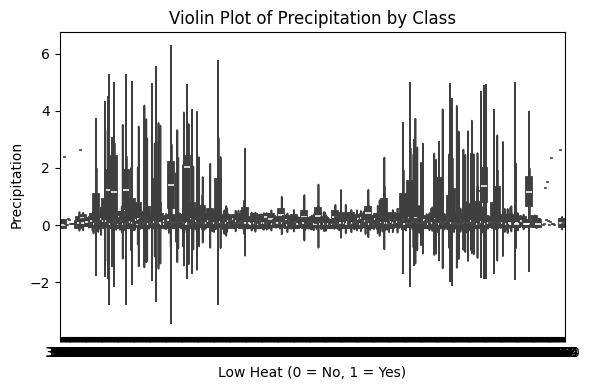

In [39]:
plt.figure(figsize=(6, 4))
sb.violinplot(data=df, x='min_temp', y='precipitation', inner='box')
plt.title('Violin Plot of Precipitation by Class')
plt.xlabel('Low Heat (0 = No, 1 = Yes)')
plt.ylabel('Precipitation')
plt.tight_layout()
plt.show()


**Interpretation of of the Plot**

This plot compares precipitation levels between two classes: 0 (No Low Heat) and 1 (Yes Low Heat). Here's what it shows:

- Class 0 (No Low Heat): The distribution of precipitation data is more varied, with a higher density of data points around zero precipitation.

- Class 1 (Yes Low Heat): The distribution is also varied, but the density of data points around zero precipitation is more pronounced.

Overall, the plot shows that precipitation levels can vary significantly regardless of the presence of low heat, but there is a noticable concentration of data points around zero precipitation for both classes.

_____

## **Binomial ogistic Regression**

**Binomial Logistic Regression** is a classification algorithm used when the **dependent variable is binary**, i.e., it can take on only two possible outcomes: 0 or 1, yes or no, true or false, etc.

Unlike linear regression, which predicts continuous values, **logistic regression predicts the probability** of a sample belonging to a particular class.


### The Math behind the Model

We use a function called the **sigmoid** to squeeze any number into a value between 0 and 1:

\[
\sigma(z) = \frac{1}{1 + e^{-z}}
\]

Where:

- \( z = \theta_0 + \theta_1 x \) (this is a linear combination of weights and input)
- \( \sigma(z) \) gives the **probability** of class 1

Think of \( \theta_0 \) as the **bias (intercept)** and \( \theta_1 \) as the **slope (weight)**.



### Using Binomial 

In [40]:
# Select features and target
X = df["max_temp"].values
humidity = df["humidity"].values

# Convert humidity to binary class: 0 = low, 1 = high
threshold = np.median(humidity)
y = (humidity > threshold).astype(int)

In [41]:
# Add intercept (bias term)
X_b = np.c_[np.ones(X.shape[0]), X]

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Predict function
def predict(X, weights):
    return sigmoid(X.dot(weights))

# Binary cross-entropy loss
def compute_loss(y, y_pred):
    eps = 1e-15
    return -np.mean(y * np.log(y_pred + eps) + (1 - y) * np.log(1 - y_pred + eps))

# Training using gradient descent
def logistic_regression(X, y, lr=0.01, n_iterations=1000):
    weights = np.zeros(X.shape[1])
    loss_history = []

    for i in range(n_iterations):
        y_pred = predict(X, weights)
        gradient = X.T.dot(y_pred - y) / y.size
        weights -= lr * gradient

        loss = compute_loss(y, y_pred)
        loss_history.append(loss)

        if i % 100 == 0:
            print(f"Iteration {i}: Loss = {loss:.4f}")
    
    return weights, loss_history


Iteration 0: Loss = 0.6931
Iteration 100: Loss = 16.3213
Iteration 200: Loss = 13.4280
Iteration 300: Loss = 10.1204
Iteration 400: Loss = 4.6623
Iteration 500: Loss = 17.3173
Iteration 600: Loss = 2.4816
Iteration 700: Loss = 11.3328
Iteration 800: Loss = 1.6577
Iteration 900: Loss = 10.3674


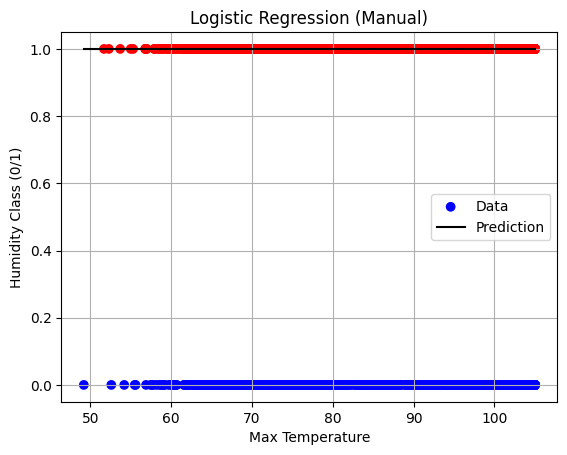

In [42]:
# Train
weights, loss_history = logistic_regression(X_b, y, lr=0.1, n_iterations=1000)

# Plot sigmoid curve
x_vals = np.linspace(X.min(), X.max(), 100)
x_vals_b = np.c_[np.ones(x_vals.shape[0]), x_vals]
y_preds = predict(x_vals_b, weights)

plt.scatter(X, y, c=y, cmap='bwr', label="Data")
plt.plot(x_vals, y_preds, color='black', label='Prediction')
plt.xlabel("Max Temperature")
plt.ylabel("Humidity Class (0/1)")
plt.title("Logistic Regression (Manual)")
plt.legend()
plt.grid(True)
plt.show()


**Interpretation of of the Graph**


 The black line represents the prediction made by your logistic regression model.

The blue dots are clustered around y=0 and y=1, which are the two classes of humidity. The red dots, which overlap with the blue ones, show that the logistic regression model has predicted these classes accurately.

____

## **Multinomial Logistic Regression**

Multinomial logistic regression  is a **generalization of binary logistic regression** for problems involving **more than two classes**.


### The Mathematical Formulation

Given:

- A dataset of `n` samples with `d` features: \( X \in \mathbb{R}^{n \times d} \)
- Target labels \( y \in \{0, 1, ..., K-1\} \), where \( K \) is the number of classes
- A weight matrix \( W \in \mathbb{R}^{d \times K} \)
- A bias vector \( b \in \mathbb{R}^{1 \times K} \)

#### 1. Linear Transformation

Raw class scores (logits) for each class are imputed:

\[
Z = XW + b
\]

Whereby :
- \( Z \) → Logits (raw prediction scores before softmax), shape: (n_samples, n_classes)
- \( X \) → Input feature matrix, shape: (n_samples, n_features)
- \( W \) → Weight matrix, shape: (n_features, n_classes)
- \( b \) → Bias vector, shape: (1, n_classes)


#### 2. Softmax Activation

To convert raw scores into **probabilities** for each class, we apply the **softmax function**:

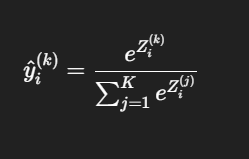

Whereby;

- \( \hat{y}_i^{(k)} \) → Predicted probability that sample \( i \) belongs to class \( k \)  
- \( Z_i^{(k)} \) → Raw score (logit) for class \( k \) and sample \( i \)  
- \( e \) → Euler’s number (base of the natural logarithm)  
- \( K \) → Total number of classes  
- \( \sum_{j=1}^{K} e^{Z_i^{(j)}} \) → Sum of exponentiated logits for all classes (used to normalize probabilities)


This ensures:

- Each probability \( \hat{y}_i^{(k)} \in (0, 1) \)
- The probabilities across all classes for a sample sum to 1



###  Cross-Entropy Loss

The model is trained to minimize the **cross-entropy loss** between the true class labels and predicted probabilities:

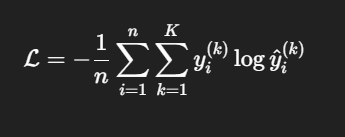

Where:

- \( y_i^{(k)} = 1 \) if sample \( i \) belongs to class \( k \), otherwise 0
- \( \hat{y}_i^{(k)} \) is the predicted probability of sample \( i \) being in class \( k \)


### Training with Gradient Descent

We minimize the loss using **batch gradient descent**.

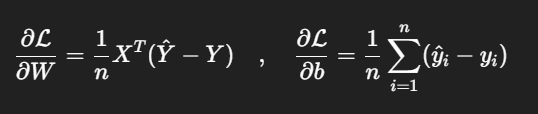


Whereby:
- \( \mathcal{L} \) → Loss function (cross-entropy)
- \( W \) → Weight matrix
- \( b \) → Bias vector
- \( X \) → Input feature matrix
- \( n \) → Number of training samples
- \( Y \) → True labels (one-hot encoded)
- \( \hat{Y} \) → Predicted probabilities (from softmax)
- \( \hat{y}_i \) → Predicted probability vector for sample \( i \)
- \( y_i \) → True one-hot label vector for sample \( i \)

#### Gradients:

- Gradient w.r.t weights \( W \):

    \[
    \frac{\partial \mathcal{L}}{\partial W} = \frac{1}{n} X^T (\hat{Y} - Y)
    \]

- Gradient w.r.t bias \( b \):

    \[
    \frac{\partial \mathcal{L}}{\partial b} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)
    \]

We update parameters:

\[
W := W - \alpha \frac{\partial \mathcal{L}}{\partial W} \quad,\quad b := b - \alpha \frac{\partial \mathcal{L}}{\partial b}
\]

Where \( \alpha \) is the learning rate.



In the code below, a class is created to implement **Multinomial Logistic Regression** (also known as Softmax Regression) using NumPy, It supports multi-class classification and outputs class probabilities using the **softmax function**.



First Scikit-Learn package had to be installed


In [43]:
# Installing Sckitit Learn
! pip install scikit-learn


[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class MultinomialLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def _softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # numerical stability
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def _one_hot(self, y, num_classes):
        one_hot = np.zeros((y.shape[0], num_classes))
        one_hot[np.arange(y.shape[0]), y] = 1
        return one_hot

    def fit(self, X, y):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))

        self.weights = np.zeros((n_features, n_classes))
        self.bias = np.zeros((1, n_classes))

        y_one_hot = self._one_hot(y, n_classes)

        for i in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self._softmax(linear_model)

            error = y_pred - y_one_hot
            dw = np.dot(X.T, error) / n_samples
            db = np.sum(error, axis=0, keepdims=True) / n_samples

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            if i % 100 == 0:
                loss = -np.mean(np.sum(y_one_hot * np.log(y_pred + 1e-9), axis=1))
                print(f"Iteration {i}, Loss: {loss:.4f}")

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self._softmax(linear_model)
        return np.argmax(y_pred, axis=1)

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self._softmax(linear_model)


In [45]:
# Define features
X = df[['max_temp', 'min_temp', 'humidity', 'wind_speed', 'pressure', 'solar_radiation']]

# Define multi-class target from precipitation
def categorize_precip(p):
    if p == 0:
        return 0  # No rain
    elif p <= 5:
        return 1  # Light rain
    else:
        return 2  # Heavy rain

y = df['precipitation'].apply(categorize_precip)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train model
model = MultinomialLogisticRegression(learning_rate=0.1, num_iterations=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f"\nAccuracy: {accuracy:.4f}")


Iteration 0, Loss: 0.6931
Iteration 100, Loss: 0.1784
Iteration 200, Loss: 0.1685
Iteration 300, Loss: 0.1670
Iteration 400, Loss: 0.1666
Iteration 500, Loss: 0.1664
Iteration 600, Loss: 0.1663
Iteration 700, Loss: 0.1663
Iteration 800, Loss: 0.1663
Iteration 900, Loss: 0.1662

Accuracy: 0.9343


**Interpretation of Results**

 **Iteration 0 Initial Loss**: 0.6931  
   Since it's the log loss for a uniform distribution (random guess across two or more classes), this is to be expected.


  **Iteration 900 Final Loss**: 0.1662  
   With a significantly reduced loss, the model can now predict the right classes with confidence.

 **Convergence**: The model has converged when the loss stabilizes between iterations 400 and 500.

 **Accuracy**: 93.43%, or 0.9343  
   The model accurately predicts the target class for around 93% of the test data, indicating good classification performance.


 The class distinctions have been successfully **learned to distinguish** by the model.
   The model's dependability on this dataset is confirmed by its great accuracy and diminishing loss.

____

## **Probability Estimation**



In logistic regression, **probability estimation** refers to predicting **how likely** it is that a given input belongs to the **positive class (label = 1)**. Instead of returning a class label directly, the model outputs a **probability between 0 and 1** using the **sigmoid function**.



### The Math Behind It

####  Linear Combination

\[
z = X \cdot w + b
\]

- \( X \): Feature vector (inputs)
- \( w \): Weights
- \( b \): Bias
- \( z \): Raw prediction (logit)

####  Sigmoid Activation (Probability Output)

\[
\hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}}
\]

- Converts the raw score \( z \) into a probability \( \hat{y} \in (0, 1) \)
- If \( \hat{y} \geq 0.5 \), predict class `1`; else, class `0`





### About the Code Below

In order to update weights and bias, the class (MyLogisticRegression) uses gradient descent to construct logistic regression. 

  The `predict_proba()` method uses the sigmoid function to return the predicted probability that a sample belongs to the positive class.
  
  These probabilities are transformed into binary class labels using a threshold of 0.5 using the `predict()` technique.

In [46]:
class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)

    def predict(self, X):
        proba = self.predict_proba(X)
        return [1 if i >= 0.5 else 0 for i in proba]


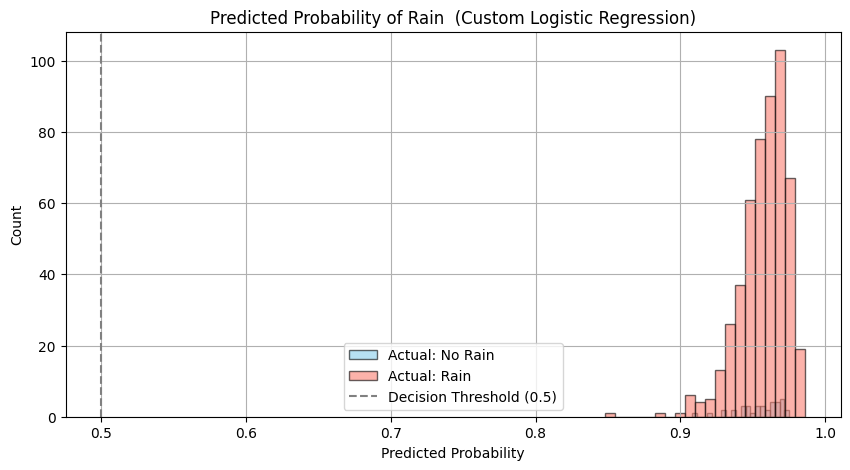

In [47]:
import matplotlib.pyplot as plt

# Step 1: Fit the model
model = MyLogisticRegression(learning_rate=0.1, n_iters=1000)
model.fit(X_train, y_train)

# Step 2: Get predicted probabilities
probs = model.predict_proba(X_test)
preds = model.predict(X_test)

# Step 3: Plot predicted probabilities histogram
plt.figure(figsize=(10, 5))
plt.hist(probs[y_test == 0], bins=20, alpha=0.6, label='Actual: No Rain', color='skyblue', edgecolor='black')
plt.hist(probs[y_test == 1], bins=20, alpha=0.6, label='Actual: Rain', color='salmon', edgecolor='black')
plt.axvline(0.5, color='gray', linestyle='--', label='Decision Threshold (0.5)')
plt.title('Predicted Probability of Rain  (Custom Logistic Regression)')
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


**Interpretation of Graph**

Instances with blue bars indicate those where the real result was "No Rain."
 For example, red bars indicate that the actual result was "Rain."
 Decision Threshold: The decision threshold for separating rain from no rain is shown by the vertical dashed line at 0.5.

 Based on the expected probabilities, the plot illustrates how well the model separates the two classes (rain and no rain).  You would anticipate seeing red bars on the right side (high probability) and blue bars mostly on the left (low probabilities) if the model is functioning properly.

### Calibration Curve

A calibration curve, sometimes referred to as a reliability diagram, is a graph that illustrates how well the actual results match the expected probability from a classification model.

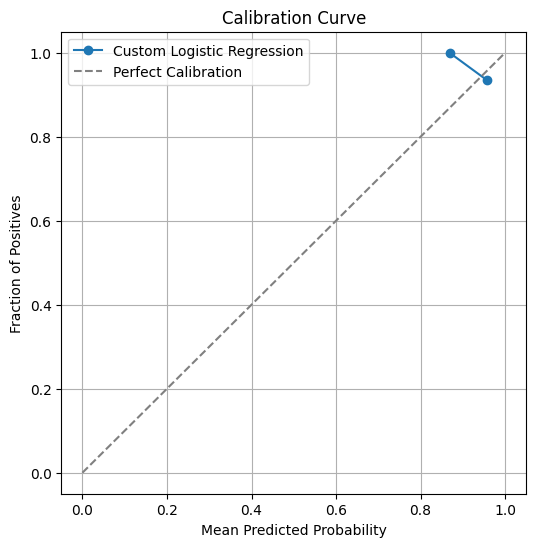

In [48]:
from sklearn.calibration import calibration_curve

# Compute calibration curve
prob_true, prob_pred = calibration_curve(y_test, probs, n_bins=10)

plt.figure(figsize=(6, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Custom Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfect Calibration')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend()
plt.grid(True)
plt.show()


**Intepreation of the Graph**

The closer the curve is to the diagonal line (y = x), the better calibrated the model is. This means the predicted probabilities are accurate.

  Difference from Previous Plot: The calibration curve evaluates the accuracy of the anticipated probabilities, whereas the bar plot displayed the distribution of predicted probability for rain and no rain.  It aids in determining the accuracy of the model's probability estimates.

  In conclusion, the bar plot illustrates the distribution of the model's probability forecasts over the two classes, while the calibration curve offers information about how reliable those predictions are.

_____

## **Conclusion**

The theory and real-world application of **Logistic Regression** were examined in this notebook, emphasizing its adaptability and use in various categorization tasks.

 Binary classification, in which results fall into one of two classifications, was carried out using **Binary Logistic Regression**.

 This was expanded to multi-class classification issues by **Multinomial Logistic Regression**, which enabled the model to predict more than two potential categories.

 A crucial component of logistic regression was shown to be **Probability Estimation**, where the model produces **probabilities** that can be read for decision-making confidence in addition to class labels.

 In both binary and multi-class scenarios, each type of logistic regression demonstrated how linear models may be converted using functions like the **sigmoid** and **softmax** to produce strong, comprehensible predictions.


  #### Concluding Remarks: - Logistic regression is useful for **estimating probabilities** with practical interpretability, not only for classification.
